In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

from yellowbrick.features import Rank1D

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE

%matplotlib inline

In [2]:
df = pd.read_csv('data_full_1.csv')

In [3]:
quan = {}
i = 1
for index in df['district'].value_counts().index:
    quan[index] = i
    i+=1
df['district'] = df['district'].map(quan)

### quan sát sơ bộ dữ liệu

Text(0.5, 1.0, 'Percent missing data by feature')

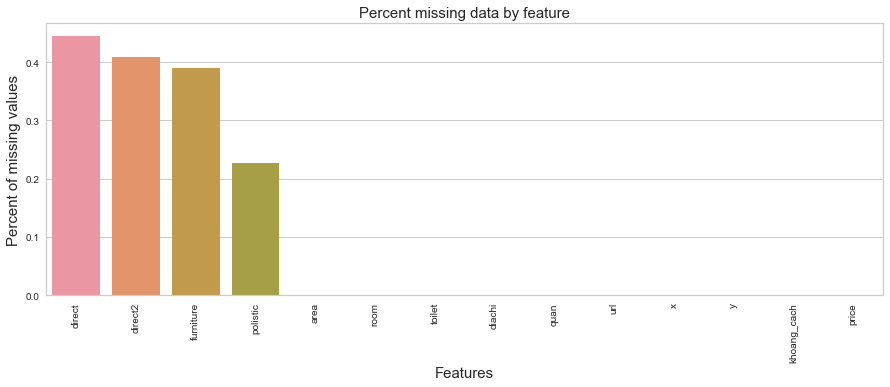

In [4]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

3 feature co luong missing value kha lon

### kiem tra su phan bo cua gia ca, khoang cach, dien tich

Text(0.5, 1.0, 'area')

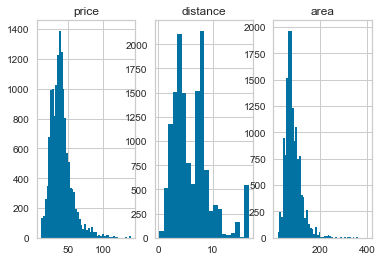

In [5]:
axs = plt.subplot2grid((1,3),(0,0))
plt.hist(df['price'], 50)
plt.title('price')

axs1 = plt.subplot2grid((1,3),(0,1))
plt.hist(df['distance'],20)
plt.title('distance')

axs2 = plt.subplot2grid((1,3), (0,2))
plt.hist(df['area'], 50)
plt.title('area')

### bay gio chung ta se dung cac thong tin de dien vao missing value o cot polistic

chia du lieu thanh 2 phan:
    du lieu khong co missing value va
    du lieu la missing value

In [6]:
#df1 la du lieu khong co missing value
df0m = df[pd.isnull(df['polistic'])==False]
df1 = df0m[['n_rooms', 'n_toilets', 'area', 'x', 'y', 'district', 'district', 'polistic']]
#df2 la du lieu toan bo la missing value
df1m = df[pd.isnull(df['polistic'])==True]
df2 = df1m[['n_rooms', 'n_toilets', 'area', 'x', 'y', 'district', 'district', 'polistic']]

quan sat gia su can bang trong tap df1

([<matplotlib.patches.Wedge at 0x23b457ea970>,
 [Text(-1.0245931484596307, 0.40026101500093836, 'so do'),
  Text(0.9937421500001314, -0.4716741876688999, 'hdmb'),
  Text(1.0972492548416835, -0.07774363478363061, 'chua so')])

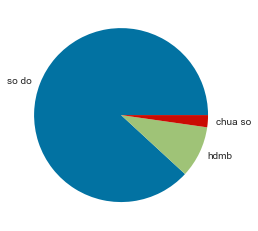

In [7]:
plt.pie(df1['polistic'].value_counts(), labels = df1['polistic'].value_counts().index)

cac feature se danh de dien cot polistic la area, room, toilet, khoang_cach, quan, x, y

### chuyen du lieu ve dang so

In [8]:
polistic = {}
i = 1
for index in df1['polistic'].value_counts().index:
    polistic[index] = i
    i+=1
df1['polistic']=df1['polistic'].map(polistic)

<ipython-input-8-186db1cb8b69>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['polistic']=df1['polistic'].map(polistic)


### using smote for polistic

In [9]:
data = df1.values
X, y = data[:, :-1], data[:, -1]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [10]:
rf = RandomForestClassifier()
rf.fit(X,y)
k = rf.predict(df2[['n_rooms', 'n_toilets', 'area', 'x', 'y', 'distance', 'district']])
df2['polistic'] = k.astype(int)

C:\Users\huyvq\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
<ipython-input-10-22bd31760ea1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['polistic'] = k.astype(int)


In [11]:
df1.insert(0, 'direct', df0m['direct'])
df1.insert(0,  'direct2', df0m[ 'direct2'])
df1.insert(0,  'furniture', df0m['furniture'])
df1.insert(0,  'price', df0m['price'])
#*************
df2.insert(0, 'direct', df1m['direct'])
df2.insert(0,  'direct2', df1m[ 'direct2'])
df2.insert(0,  'furniture', df1m['furniture'])
df2.insert(0,  'price', df1m['price'])

df = df1.append(df2)

### dien furniture

In [12]:
#df1 la du lieu khong co missing value
df0m = df[pd.isnull(df['furniture'])==False]
df1 = df0m[['n_rooms', 'n_toilets', 'area', 'x', 'y', 'distance', 'district', 'polistic', 'furniture']]
#df2 la du lieu toan bo la missing value
df1m = df[pd.isnull(df['furniture'])==True]
df2 = df1m[['n_rooms', 'n_toilets', 'area', 'x', 'y', 'distance', 'district', 'polistic', 'furniture']]

In [13]:
furniture = {}
i = 1
for index in df1['furniture'].value_counts().index:
    furniture[index] = i
    i+=1
df1['furniture'] = df1['furniture'].map(furniture)

<ipython-input-13-9171970da72e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['furniture'] = df1['furniture'].map(furniture)


In [14]:
data = df1.values
X, y = data[:, :-1], data[:, -1]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [15]:
k = rf.predict(df2[['n_rooms', 'n_toilets', 'area', 'x', 'y', 'distance', 'district', 'polistic']])
df2['furniture'] = k.astype(int)

C:\Users\huyvq\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
<ipython-input-15-8010b3ad974c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['furniture'] = k.astype(int)


In [16]:
df1.insert(0, 'house_direct', df0m['house_direct'])
df1.insert(0,  'balcony_direct', df0m[ 'balcony_direct'])
df1.insert(0,  'price', df0m['price'])
#*************
df2.insert(0, 'house_direct', df1m['house_direct'])
df2.insert(0,  'balcony_direct', df1m[ 'balcony_direct'])
df2.insert(0,  'price', df1m['price'])

In [17]:
df = df1.append(df2)

### dien direct

In [18]:
#df1 la du lieu khong co missing value
df0m = df[pd.isnull(df['direct'])==False]
df1 = df0m[['n_rooms', 'n_toilets', 'area', 'x', 'y', 'distance', 'district', 'polistic', 'furniture', 'house_direct']]
#df2 la du lieu toan bo la missing value
df1m = df[pd.isnull(df['direct'])==True]
df2 = df1m[['n_rooms', 'n_toilets', 'area', 'x', 'y', 'distance', 'district', 'polistic', 'furniture', 'house_direct']]

In [19]:
direct = {}
i = 1 
for index in df1['house_direct'].value_counts().index:
    direct[index] = i
    i+=1
df1['house_direct'] = df1['house_direct'].map(direct)

<ipython-input-19-50d12dabfe03>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['direct'] = df1['direct'].map(direct)


In [20]:
data = df1.values
X, y = data[:, :-1], data[:, -1]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
rf = RandomForestClassifier()
rf.fit(X,y)
k = rf.predict(df2[['n_rooms', 'n_toilets', 'area', 'x', 'y', 'distance', 'district', 'polistic', 'furniture']])
df2['direct'] = k.astype(int)
#############
df1.insert(0,  'balcony_direct', df0m[ 'balcony_direct'])
df1.insert(0,  'price', df0m['price'])
#*************
df2.insert(0,  'balcony_direct', df1m[ 'balcony_direct'])
df2.insert(0,  'price', df1m['price'])
df = df1.append(df2)

C:\Users\huyvq\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
<ipython-input-20-b5917d324fc9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['direct'] = k.astype(int)


### dien missing vao direct2

In [21]:
#df1 la du lieu khong co missing value
df0m = df[pd.isnull(df['direct2'])==False]
df1 = df0m[['n_rooms', 'n_toilets', 'area', 'x', 'y', 'distance', 'district', 'polistic', 'furniture', 'house_direct', 'balcony_direct']]
#df2 la du lieu toan bo la missing value
df1m = df[pd.isnull(df['direct2'])==True]
df2 = df1m[['n_rooms', 'n_toilets', 'area', 'x', 'y', 'distance', 'district', 'polistic', 'furniture', 'house_direct', 'balcony_direct']]
##################
direct2 = {}
i = 1 
for index in df1['balcony_direct'].value_counts().index:
    direct2[index] = i
    i+=1
df1['balcony_direct'] = df1['balcony_direct'].map(direct2)
########################
data = df1.values
X, y = data[:, :-1], data[:, -1]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
rf = RandomForestClassifier()
rf.fit(X,y)
k = rf.predict(df2[['n_rooms', 'n_toilets', 'area', 'x', 'y', 'distance', 'district', 'polistic', 'furniture', 'house_direct']])
df2['balcony_direct'] = k.astype(int)
#############
df1.insert(11,  'price', df0m['price'])
#*************
df2.insert(11,  'price', df1m['price'])


<ipython-input-21-7ed650256919>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['direct2'] = df1['direct2'].map(direct2)
C:\Users\huyvq\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
<ipython-input-21-7ed650256919>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['direct2'] = k.astype(int)


In [22]:
df = df1.append(df2)

## chuyen du lieu ve dang cu

In [23]:
#chuyen quan 
quan_ ={y: x for x, y in quan.items()}
df['district'] = df['district'].map(quan_)
#chuyen polistic 
polistic_ = {y: x for x, y in polistic.items()}
df['polistic'] = df['polistic'].map(polistic_)
#chuyen furniture 
furniture_ = {y: x for x, y in furniture.items()}
df['furniture'] = df['furniture'].map(furniture_)
#chuyen direct
direct_ = {y: x for x, y in direct.items()}
df['house_direct'] = df['house_direct'].map(direct_)
#chuyen direct2
direct2_ = {y: x for x, y in direct2.items()}
df['balcony_direct'] = df['balcony_direct'].map(direct2_)

In [24]:
df.to_csv("data_full_cleaned_2.csv", header=True, index=False)